In [66]:
import skimage
from skimage import io
from skimage.transform import resize
from scipy.ndimage.filters import gaussian_laplace
from scipy.ndimage import rank_filter
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from skimage.feature import peak_local_max
import math
import time

/tmp/ipykernel_2634/2883063994.py:4: DeprecationWarning: Please use `gaussian_laplace` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_laplace


In [67]:
def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cx))
    plt.show()

In [68]:
sunflowers = io.imread("sunflowers.jpg")
sunflowers = skimage.img_as_float(sunflowers)
sunflowers = skimage.color.rgb2gray(sunflowers)

Pseudocode: 

    For s in scales:
        - Filter image with the corresponding LoG filter  
        - Square the filter response  
        - Increase the scale 
    Perform scale-space non-maximum suppression 
    Display the results

## Creating the scale space

### a) filtering the image with LoG filters of different scales

### b) keeping the same filter and down-sampling the image

In [69]:
min_sigma = 3 # 2
max_sigma = 30 # 22
num_sigma = 15
sqrt_2 = math.sqrt(2)
values = np.linspace(min_sigma, max_sigma, num_sigma)
sigmas = np.linspace(min_sigma/sqrt_2, max_sigma/sqrt_2, num_sigma)

initial_scale = 2

In [70]:
def distance(x1, x2, y1, y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

In [71]:
def distance_points(point1, point2):
    return distance(point1[0], point2[0], point1[1], point2[1])

In [72]:
distance_points((1,1),(3,3))

2.8284271247461903

In [73]:
# example
filtered_pics = []
xs = []
ys = []
rads = []

proper_coords = []
bad_coords = []

for value, sigma in zip(values,sigmas):
    pic = gaussian_laplace(sunflowers, sigma)
    coordinates = peak_local_max(pic, min_distance = int(sigma))
    for element in coordinates:
        proper_coords.append([element[1], element[0], value])
        # xs.append(element[1])
        # ys.append(element[0])
        # rads.append(value)

# for i in range(len(proper_coords)):
#     for j in range(len(proper_coords)):
#         if proper_coords[j][2] > proper_coords[i][2]:
#             bigger_r = proper_coords[j][2]
#             worse_val = i
#         else:
#             bigger_r = proper_coords[i][2]
#             worse_val = j
#         if distance(proper_coords[i][0], proper_coords[i][1], proper_coords[j][0], proper_coords[j][1]) < bigger_r:
#             bad_coords.append(proper_coords[worse_val])

# for element in proper_coords:
#     if element in bad_coords:
#         proper_coords.remove(element)
proper_coords = np.array(proper_coords)


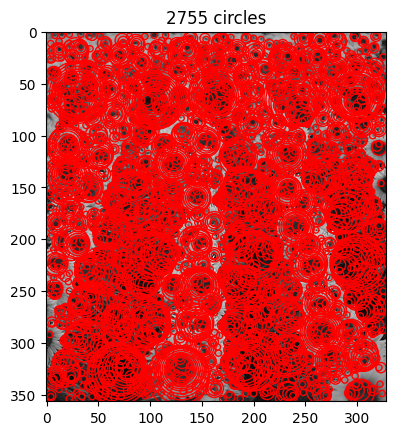

In [31]:
show_all_circles(sunflowers, proper_coords[:,0], proper_coords[:,1], proper_coords[:,2])

In [104]:
THRESHOLD_ABS = 0.7
THRESHOLD_REL = 0.2

proper_coords = []
for value, sigma in zip(values,sigmas):
    pic = gaussian_laplace(sunflowers, sigma)**2
    pic *= sigma**2
    coordinates = peak_local_max(
            pic,
            # threshold_abs=THRESHOLD_ABS,
            threshold_rel=THRESHOLD_REL,
            footprint=np.ones((3,3))
        )
    for element in coordinates:
        proper_coords.append([element[1], element[0], value])

for element1 in proper_coords:
    for element2 in proper_coords:
        if element2 != element1:
            if distance_points(element1, element2) < element1[2]:
                proper_coords.remove(element2)

proper_coords = np.array(proper_coords)

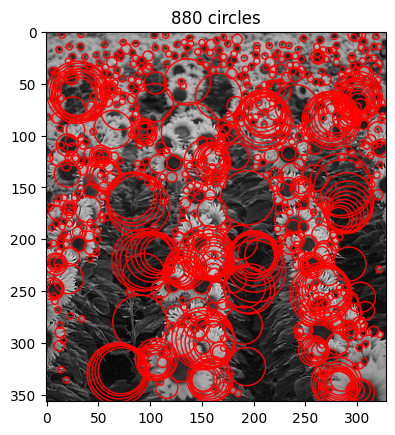

In [105]:
show_all_circles(sunflowers, proper_coords[:,0], proper_coords[:,1], proper_coords[:,2])

In [18]:
sigmas

array([ 2.12132034,  3.48502628,  4.84873221,  6.21243815,  7.57614408,
        8.93985002, 10.30355595, 11.66726189, 13.03096782, 14.39467376,
       15.7583797 , 17.12208563, 18.48579157, 19.8494975 , 21.21320344])

In [64]:
coordinates[:,1]

array([ 31, 145, 253, 154, 122, 148, 264,  53,  21, 233,  10, 123, 257,
       113, 149, 234,   8, 151,  60, 129, 321, 304, 159, 274, 243,  20,
       248,  20, 132,  22, 293,  43, 127,   7, 302, 179, 280,  70, 295,
       272, 151, 250, 299, 189, 260, 173, 171, 210, 187,  92, 262,  84,
       264,  95,  95,  58,  36, 307,  10, 130, 174, 175,  14,  74, 133,
        66, 119,  24, 282, 308, 173, 219, 260, 296,  40, 255, 240, 221,
        41, 282, 223, 108,  98, 171, 233, 136, 227, 112, 162, 277, 199,
       163, 155, 315, 179, 279,  98, 134, 278,  35, 122, 248,  53, 264,
       168, 317, 246,  81, 223, 316, 220, 211,  31,  18,  46, 219,  99,
       146, 139, 250, 238, 241,  89, 287,  99,  52, 117, 109, 263, 131,
       163,  71,  53,  32, 179, 202, 112, 110, 152, 184,  61,  33, 210,
       142, 216, 261, 126,  79,  39, 157, 193, 239,  60, 293, 143, 112,
        13,   9, 243, 175, 222, 278, 151, 203,  29,  56, 177,  25, 305,
        44, 234, 198, 249,  79, 316, 313, 184, 150, 192,  90, 18